# §4. 線形回帰・重回帰モデル

今回は、線形回帰・重回帰モデルについて学習していきます。

## 1. 線形回帰・重回帰モデルについて

### 1.1. 線形回帰・重回帰モデルとは？

重回帰モデルは、以下のような式で表されます。

$$y = w_0 +  w_1 x_1 + w_2 x_2 + \cdots + w_N x_N$$

要するに、単回帰モデル$y = w_0 +  w_1 x_1の$「特徴量が2つ以上ある場合」
が、重回帰モデルです。




単回帰モデルでは、1つの特徴量を使ってターゲットの予測をしましたが、重回帰モデルでは複数の特徴量を使って予測をします。

<br/>

以前に考えていたアイスクリームの例で、もう少し具体的に見ていきましょう。

単回帰モデルでは、気温からアイスクリームの売上個数を予測していましたが、1時間当たりの雨量によっても、アイスクリームの売上は左右するはずです。雨量が0(=つまり雨が降っていない)なら、アイスクリームは売れるだろうし、雨量が多ければ外に出てアイスクリームを買いに行くのも渋ってしまいますよね。

これを変数にして表を作成すると、以下のようになります。

- $x_1$ : 気温
- $x_2$ : 雨量
- $y$ : アイスクリームの売上個数


<table border="1">
    <tr>
      <th>気温</th>
      <th>雨量</th>
      <th>アイスクリームの売上個数</th>
    </tr>
    <tr>
      <td>28</td>
      <td>5</td>
      <td>10</td>
    </tr>
    <tr>
      <td>26</td>
      <td>5</td>
      <td>9</td>
    </tr>
    <tr>
      <td>20</td>
      <td>6</td>
      <td>4</td>
    </tr>
    <tr>
      <td>24</td>
      <td>10</td>
      <td>7</td>
    </tr>
    <tr>
      <td>22</td>
      <td>7</td>
      <td>5</td>
    </tr>
</table>

数字は適当ですが、だいたいこんな感じの表が作れますね。

重回帰モデルでは、気温と雨量を使って、アイスクリームの売上を予測していくことになります。

<br/>

そして、重回帰式$y = w_0 +  w_1 x_1 + w_2 x_2$の、$w_0$と$w_1$と$w_2$を求めれば、重回帰モデルを求められます。単回帰モデルと同じですね。

## 2. 線形回帰・重回帰モデルの実装

重回帰モデルの概要が分かったところで、さっそく実装をしていきましょう。

実装は、単回帰モデルとほとんど同じで、以下の手順で進めていきます。

- STEP① : ライブラリの読み込み
- STEP② : データの読み込み
- STEP③ : データの準備
- STEP④ : 重回帰モデルの作成と評価

### 2.1 ライブラリの読み込み

今回必要になるライブラリをインポートします。

- Numpy : 配列計算用ライブラリ
- Pandas : データ操作用ライブラリ
- Scikit-learn(sklearn) : データの準備・機械学習モデルの作成用ライブラリ
- Matplotlib : 作図用ライブラリ①
- Seaborn : 作図用ライブラリ②
- mpl_toolkits : 3D作図の準備ライブラリ

In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

sns.set()
sns.set_style("ticks")

%matplotlib inline

### 2.2 データの読み込み

単回帰モデルのときと同じく、「ボストンの住宅価格」データを使って予測していきます。

データの中身は、以下の表のとおりです。

<table style="border-collapse: collapse; width: 100%;" border="1">
<tbody>
<tr>
<td style="width: 38.9855%; background-color: #28467a; text-align: center;"><span style="font-size: 14px;"><strong><span style="color: #ffffff;">変数名</span></strong></span></td>
<td style="width: 61.0145%; background-color: #28467a; text-align: center;"><span style="font-size: 14px;"><strong><span style="color: #ffffff;">データの説明</span></strong></span></td>
</tr>
<tr>
<td style="width: 38.9855%; text-align: center;"><span style="font-size: 14px;">CRIM</span></td>
<td style="width: 61.0145%; text-align: center;"><span style="font-size: 14px;">犯罪発生率</span></td>
</tr>
<tr>
<td style="width: 38.9855%; text-align: center;"><span style="font-size: 14px;">ZN</span></td>
<td style="width: 61.0145%; text-align: center;"><span style="font-size: 14px;">住居区画の密集度</span></td>
</tr>
<tr>
<td style="width: 38.9855%; text-align: center;"><span style="font-size: 14px;">INDUS</span></td>
<td style="width: 61.0145%; text-align: center;"><span style="font-size: 14px;">非小売業の土地割合</span></td>
</tr>
<tr>
<td style="width: 38.9855%; text-align: center;"><span style="font-size: 14px;">CHAS</span></td>
<td style="width: 61.0145%; text-align: center;"><span style="font-size: 14px;">チャールズ川の周辺か否か</span></td>
</tr>
<tr>
<td style="width: 38.9855%; text-align: center;"><span style="font-size: 14px;">NOX</span></td>
<td style="width: 61.0145%; text-align: center;"><span style="font-size: 14px;">NOx濃度</span></td>
</tr>
<tr>
<td style="width: 38.9855%; text-align: center;"><span style="font-size: 14px;">RM</span></td>
<td style="width: 61.0145%; text-align: center;"><span style="font-size: 14px;">住居に含まれる平均部屋数</span></td>
</tr>
<tr>
<td style="width: 38.9855%; text-align: center;"><span style="font-size: 14px;">AGE</span></td>
<td style="width: 61.0145%; text-align: center;"><span style="font-size: 14px;">1940年より前に建てられた物件の割合</span></td>
</tr>
<tr>
<td style="width: 38.9855%; text-align: center;"><span style="font-size: 14px;">DIS</span></td>
<td style="width: 61.0145%; text-align: center;"><span style="font-size: 14px;">ボストン市の5つの雇用施設からの重み付き距離</span></td>
</tr>
<tr>
<td style="width: 38.9855%; text-align: center;"><span style="font-size: 14px;">RAD</span></td>
<td style="width: 61.0145%; text-align: center;"><span style="font-size: 14px;">大きな道路へのアクセスのしやすさ</span></td>
</tr>
<tr>
<td style="width: 38.9855%; text-align: center;"><span style="font-size: 14px;">TAX</span></td>
<td style="width: 61.0145%; text-align: center;"><span style="font-size: 14px;">1万ドルあたりの不動産税率の総計</span></td>
</tr>
<tr>
<td style="width: 38.9855%; text-align: center;"><span style="font-size: 14px;">PTRATIO</span></td>
<td style="width: 61.0145%; text-align: center;"><span style="font-size: 14px;">教師あたりの生徒数</span></td>
</tr>
<tr>
<td style="width: 38.9855%; text-align: center;"><span style="font-size: 14px;">B</span></td>
<td style="width: 61.0145%; text-align: center;"><span style="font-size: 14px;">対象地域に住む黒人の比率</span></td>
</tr>
<tr>
<td style="width: 38.9855%; text-align: center;"><span style="font-size: 14px;">LSTAT</span></td>
<td style="width: 61.0145%; text-align: center;"><span style="font-size: 14px;">低所得者の割合</span></td>
</tr>
</tbody>
</table>

上記の表に入っているデータを使って、住宅価格=MEDVを予測します。

In [2]:
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


今回は、RM(=住宅に含まれる平均部屋数)とLSTAT(=低所得者の割合)を使って、MEDV(=住宅価格)を予測しましょう。

散布図を使って可視化しておくと、以下のようになります。

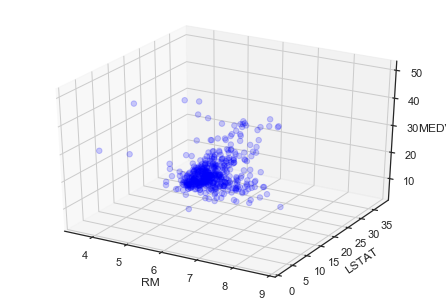

In [3]:
X = df.RM
Y = df.LSTAT
Z = df.MEDV

fig = plt.figure()
ax = Axes3D(fig)

ax.set_xlabel('RM')
ax.set_ylabel('LSTAT')
ax.set_zlabel('MEDV')

ax.scatter(X,Y,Z, s=30, c='blue', alpha=0.2)

plt.show()

- RM : 5
- LSTAT : 20
- MEDV : 10

くらいの場所に集中しているように見えますね。

### 2.3 データの準備

それでは、重回帰モデルの実装で必要なデータの準備をしていきます。

特徴量(=機械学習で使う変数)はRMとLSTAT、予測対象はMEDVですね。

In [4]:
X = df[['RM', 'LSTAT']]
y = df['MEDV']

print('-'*10 + '特徴量とターゲットに分割' + '-'*10)
print('X:', X.shape)
print('y:', y.shape)

----------特徴量とターゲットに分割----------
X: (506, 2)
y: (506,)


特徴量とターゲットの組み合わせを、Scikit-learnに含まれている`train_test_split()`を使って学習用データとテスト用データに分割します。

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

元々506行あったデータを、学習:テスト = 8:2で分割したので、以下のデータ数になります。
- 学習用データ : 404
- テスト用データ : 102

In [6]:
print('元データ', X.shape)
print('学習用データ', X_train.shape)
print('テスト用データ', X_test.shape)

元データ (506, 2)
学習用データ (404, 2)
テスト用データ (102, 2)


### 2.4 重回帰モデルの作成と評価

重回帰モデルの作成には、単回帰同様に`LinearRegression()`を使います。

そして、モデルの学習は`lm.fit()`を使うだけです。

In [7]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

これで重回帰モデルの作成が完了しました。

あとは、学習結果を見てみましょう。`lm.score()`を使えばモデルの決定係数を確認できます。

In [8]:
print('Train Score：{:.2f}' .format(lm.score(X_train, y_train)))
print('Test Score：{:.2f}' .format(lm.score(X_test, y_test)))

Train Score：0.66
Test Score：0.54


決定係数は、0〜1の値を取り、1に近い方が精度が良いという解釈になります。

単回帰モデルのときは、

- Train Score：0.50
- Test Score：0.42

だったので、精度はかなりよくなりましたね。

ちなみに、**「良い重回帰モデルを作成する」とは、単回帰のときと同じで、重回帰式$y = w_0 + w_1 x_1+ w_2 x_2$に含まれる、$w_0$と$w_1$と$w_2$で最適な値を求めること**になります。

実際に中身を確認してみましょう。

In [9]:
print('バイアス', lm.intercept_)
print('重み', lm.coef_)

バイアス -1.2625286844374664
重み [ 5.10906846 -0.65494879]


バイアスと呼んでいるのが、$w_0$、重みと呼んでいるのが$w_1$と$w_2$です。

数式で表すと、以下のようなモデルが完成したことになります。

$$y =  -1.2625 + 5.1091 x_1 - 0.6550 x_2$$

### 2.5 学習結果の可視化

元データと、今回作成した重回帰モデルの予測結果を確認してみます。


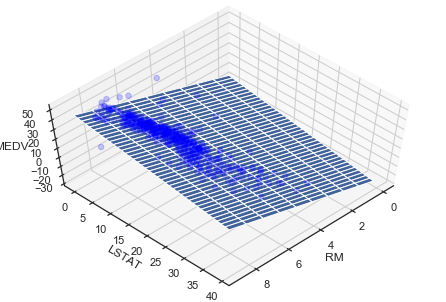

In [10]:
a1, a2 = lm.coef_
b = lm.intercept_

#　実測値(散布図)の描画
X = df.RM
Y = df.LSTAT
Z = df.MEDV

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X,Y,Z, s=30, c='blue', alpha=0.2)

# 回帰平面を描画
X_3d, Y_3d = np.meshgrid(np.arange(0, 10, 1), np.arange(0, 40, 1))
Z_3d = a1 * X_3d + a2 * Y_3d + b
ax.plot_surface(X_3d, Y_3d, Z_3d)
ax.set_xlabel('RM')
ax.set_ylabel('LSTAT')
ax.set_zlabel('MEDV')

ax.view_init(elev=60, azim=45)

plt.show()

単回帰モデルでは"直線"を予測しましたが、重回帰モデルでは、"平面"を予測することになります。

特徴量が2つ、予測対象が1つの合計3つだったので3次元になるんですね。

<br/>

ちなみに、特徴量が3つにあれば4次元平面になりますが、、、これは可視化できません。なので、作図できる範囲で重回帰モデルを作るなら、特徴量は2つまでになります。

In [11]:
#notebookをpythonファイルに変換
# ! jupyter nbconvert --to script ml04_multiple_regression.ipynb